# EDA - Exploratory Data Analysis

Hypothesis- To extract Useful information from data 

### 1. Import Packages 

In [2]:
from matplotlib.pyplot import GridSpec
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os, sys
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
sns.set_context("poster", font_scale=1.3)

import missingno as msno
import pandas_profiling

from sklearn.datasets import make_blobs
import time

### 2. Reading DATA

In [3]:
fifa=pd.read_csv('fifa19_data.csv')

###  3. Increase the limit of viewing columns in juypeter notebook

By selecting 'None' , you can remove the limit of displaying rows and columns. 

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### 4. Checking data

In [5]:
fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [6]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

In [7]:
# Resetting limits
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 20)

### 5. Removing Spaces from column names
    Some columns having name with spaces, so now we are removing spaces in columns name. 

In [8]:
fifa.columns=fifa.columns.str.replace(' ','')

In [9]:
fifa.columns

Index(['Unnamed:0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'ClubLogo', 'Value', 'Wage', 'Special',
       'PreferredFoot', 'InternationalReputation', 'WeakFoot', 'SkillMoves',
       'WorkRate', 'BodyType', 'RealFace', 'Position', 'JerseyNumber',
       'Joined', 'LoanedFrom', 'ContractValidUntil', 'Height', 'Weight', 'LS',
       'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM',
       'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB',
       'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDi

    From description we know that some columns having data in 'object', we will check for some columns to get know the format of data in that perticular columns. 

In [10]:
fifa[['ReleaseClause','Wage','Value']].head(10)

,ReleaseClause,Wage,Value
0,€226.5M,€565K,€110.5M
1,€127.1M,€405K,€77M
2,€228.1M,€290K,€118.5M
3,€138.6M,€260K,€72M
4,€196.4M,€355K,€102M
5,€172.1M,€340K,€93M
6,€137.4M,€420K,€67M
7,€164M,€455K,€80M
8,€104.6M,€380K,€51M
9,€144.5M,€94K,€68M


### 6. We can change object in integer by doing some changes, which will be helpful for computation
    1. First we are going to remove/replace any special charactor that columns have.
    2. We are having values in Million and Thousands
For one column we will do step by step and then afterwords we will change all. 

In [11]:
fifa['ReleaseClause']=fifa.ReleaseClause.str.replace("[({':€]", "")

In [12]:
fifa['ReleaseClause']=fifa.ReleaseClause.str.replace('M', '000000', regex=True)

In [13]:
fifa['ReleaseClause']=fifa.ReleaseClause.str.replace('K', '000', regex=True)

In [14]:
fifa['ReleaseClause']=fifa.ReleaseClause.str.replace('.', '', regex=True)

### 7. Converting data type from Objects to Integer
    We removed all unwanted charrectors from 'ReleaseClause' column but its data type is still object.
    Now, convert that data type object to int.
    "Note-Keep in mind we have 'NaN' values inside column"
    Following command will conver data type object to integer only expect columns with NaN value(null value).

In [15]:
fifa.loc[fifa['ReleaseClause'].notnull(), 'ReleaseClause'] = fifa.loc[fifa['ReleaseClause'].notnull(), 'ReleaseClause'].apply(float)

In [16]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed:0                  18207 non-null int64
ID                         18207 non-null int64
Name                       18207 non-null object
Age                        18207 non-null int64
Photo                      18207 non-null object
Nationality                18207 non-null object
Flag                       18207 non-null object
Overall                    18207 non-null int64
Potential                  18207 non-null int64
Club                       17966 non-null object
ClubLogo                   18207 non-null object
Value                      18207 non-null object
Wage                       18207 non-null object
Special                    18207 non-null int64
PreferredFoot              18159 non-null object
InternationalReputation    18159 non-null float64
WeakFoot                   18159 non-null float64
SkillMoves                 18159 non-null float64
WorkRate    

In [17]:
fifa.ReleaseClause.dtype

dtype('O')

### 8. Removing unwanted charectors from all neccesary columns and doing some required changes as above together

In [18]:
fifa[['Wage','Value']]=fifa[['Wage','Value']].replace('€.€','',regex=True)

In [19]:
fifa[['Wage','Value']]=fifa[['Wage','Value']].replace('M','000000',regex=True)

In [20]:
fifa[['Wage','Value']]=fifa[['Wage','Value']].replace('K','000',regex=True)

In [21]:
fifa.ReleaseClause.dtype

dtype('O')

In [22]:
fifa[['ReleaseClause','Wage','Value']].head()

,ReleaseClause,Wage,Value
0,2.265e+09,€565000,€110.5000000
1,1.271e+09,€405000,€77000000
2,2.281e+09,€290000,€118.5000000
3,1.386e+09,€260000,€72000000
4,1.964e+09,€355000,€102000000


In [23]:
fifa['Wage'].head()

0    €565000
1    €405000
2    €290000
3    €260000
4    €355000
Name: Wage, dtype: object

In [24]:
fifa.ReleaseClause.dtype

dtype('O')

In [25]:
# %timeit fifa.ReleaseClause.apply(lambda x: x.replace('€',''))

In [26]:
fifa['InternationalReputation'].value_counts()

1.0    16532
2.0     1261
3.0      309
4.0       51
5.0        6
Name: InternationalReputation, dtype: int64

In [27]:
fifa.InternationalReputation.describe()

count    18159.000000
mean         1.113222
std          0.394031
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          5.000000
Name: InternationalReputation, dtype: float64

In [28]:
fifa.head()

,Unnamed:0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,2.265e+09
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,1.271e+09
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,2.281e+09
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,1.386e+09
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,1.964e+09


In [94]:
players_name='Name'
players_bio=fifa[['Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes','ReleaseClause']]

In [30]:
unique_players_all_cols = fifa.groupby('Name').agg({col:'nunique' for col in players_bio})

In [31]:
unique_players_all_cols.head()

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause
Name,,,,,,,,,,,,,,,,,,,,,
A. Abang,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
A. Abdellaoui,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
A. Abdennour,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
A. Abdi,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
A. Abdu Jaber,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [32]:
unique_players_all_cols[unique_players_all_cols > 1].dropna().head()

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause
Name,,,,,,,,,,,,,,,,,,,,,
A. Ajeti,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
A. Al Ghamdi,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
A. Al Khaibari,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0
A. Al Shammari,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0
A. Andersson,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


### If data don't contain duplicate values table should be empty, but as we can see its showing us some names with number of repeated values.
    In next step we will delete duplicate values from our data.

### Dropping Duplicate values by reffering player names

In [33]:
fifa.drop_duplicates(subset ="Name", 
                     keep = False, inplace = True)

#### After droping duplicates value from data.
    Following table should show emplty values.

In [34]:
unique_players_all_cols = fifa.groupby('Name').agg({col:'nunique' for col in players_bio})


In [35]:
unique_players_all_cols[unique_players_all_cols > 1].dropna().head()

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause
Name,,,,,,,,,,,,,,,,,,,,,


In [92]:
def get_subgroup(dataframe, g_index, g_columns):
    """Helper function that creates a sub-table from the columns and runs a quick uniqueness test."""
    g = dataframe.groupby(g_index).agg({col:'nunique' for col in g_columns})
    if g[g > 1].dropna().shape[0] != 0:
        print("Warning: you probably assumed this had all unique values but it doesn't.")
    return dataframe.groupby(g_index).agg({col:'max' for col in g_columns})

In [93]:
players = get_subgroup(fifa, players_name, players_bio)
players.head()

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause
ID,,,,,,,,,,,,,,,,,,,,,
16,68.0,64.0,61.0,76.0,68.0,69.0,79.0,79.0,71.0,71.0,...,79.0,70.0,43.0,40.0,9.0,12.0,13.0,11.0,11.0,11000000.0
41,77.0,70.0,54.0,90.0,74.0,90.0,80.0,70.0,85.0,92.0,...,89.0,67.0,57.0,56.0,6.0,13.0,6.0,13.0,7.0,269000000.0
80,80.0,68.0,43.0,86.0,69.0,78.0,83.0,80.0,87.0,82.0,...,80.0,65.0,67.0,60.0,7.0,11.0,7.0,14.0,8.0,76000000.0
164,63.0,53.0,62.0,69.0,61.0,66.0,58.0,54.0,64.0,67.0,...,68.0,74.0,71.0,66.0,5.0,15.0,7.0,6.0,13.0,372000.0
657,64.0,59.0,58.0,72.0,57.0,62.0,68.0,67.0,68.0,68.0,...,82.0,59.0,66.0,62.0,6.0,9.0,10.0,9.0,7.0,263000.0


In [38]:
fifa['Name']=='Cristiano Ronaldo'

0        False
1         True
2        False
3        False
4        False
5        False
6        False
8        False
9        False
10       False
         ...  
18194    False
18196    False
18197    False
18198    False
18199    False
18201    False
18203    False
18204    False
18205    False
18206    False
Name: Name, Length: 16432, dtype: bool

In [95]:
def save_subgroup(dataframe, g_index, subgroup_name, prefix='raw_'):
    save_subgroup_filename = "".join([prefix, subgroup_name, ".csv.gz"])
    dataframe.to_csv(save_subgroup_filename, compression='gzip', encoding='UTF-8')
    test_df = pd.read_csv(save_subgroup_filename, compression='gzip', index_col=g_index, encoding='UTF-8')
    # Test that we recover what we send in
    if dataframe.equals(test_df):
        print("Test-passed: we recover the equivalent subgroup dataframe.")
    else:
        print("Warning -- equivalence test!!! Double-check.")

# Players 

In [41]:
def load_subgroup(filename, index_col=[0]):
    return pd.read_csv(filename, compression='gzip', index_col=index_col)

In [42]:
players = load_subgroup("raw_players.csv.gz")

In [43]:
players.head()

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause
Name,,,,,,,,,,,,,,,,,,,,,
A. Abang,30.0,61.0,67.0,52.0,58.0,56.0,30.0,28.0,28.0,59.0,...,45.0,32.0,17.0,21.0,6.0,6.0,7.0,13.0,9.0,723000.0
A. Abdellaoui,56.0,25.0,56.0,53.0,32.0,39.0,30.0,35.0,45.0,47.0,...,51.0,61.0,66.0,65.0,15.0,10.0,14.0,13.0,14.0,259000.0
A. Abdennour,56.0,48.0,74.0,58.0,32.0,48.0,48.0,39.0,62.0,51.0,...,75.0,68.0,73.0,75.0,12.0,8.0,7.0,8.0,15.0,NaN
A. Abdi,68.0,61.0,59.0,74.0,64.0,70.0,68.0,73.0,72.0,74.0,...,75.0,47.0,60.0,57.0,9.0,6.0,8.0,11.0,8.0,17000000.0
A. Abdu Jaber,39.0,66.0,61.0,49.0,64.0,61.0,59.0,39.0,40.0,59.0,...,49.0,17.0,13.0,15.0,7.0,11.0,7.0,6.0,12.0,843000.0


In [122]:
players.shape

(16432, 35)

### Missing data with missingno
    1.To check missing values we are using missingo library , which is pretty useful to visualize missing values pattern or in simple word, which columns has more missing values with respect to other.

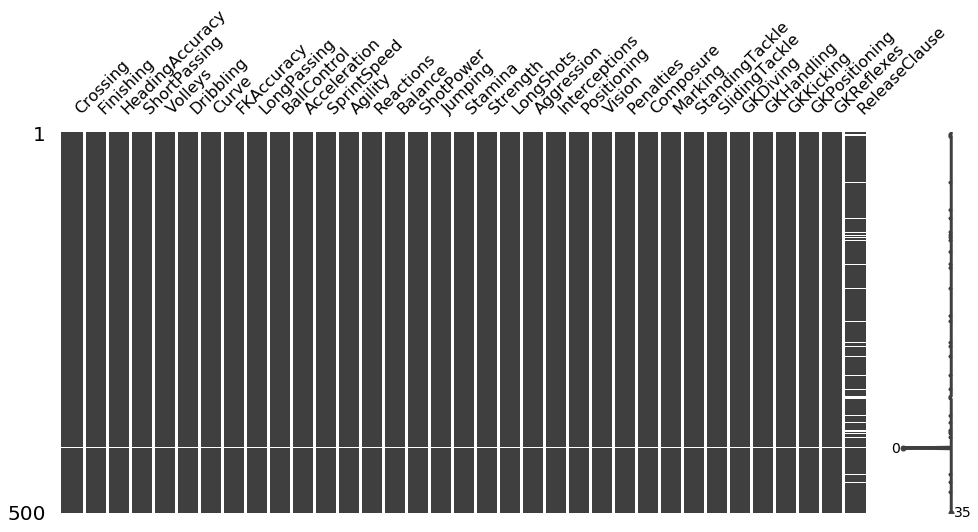

In [44]:
msno.matrix(players.sample(500),
            figsize=(16, 7),
            width_ratios=(15, 1))

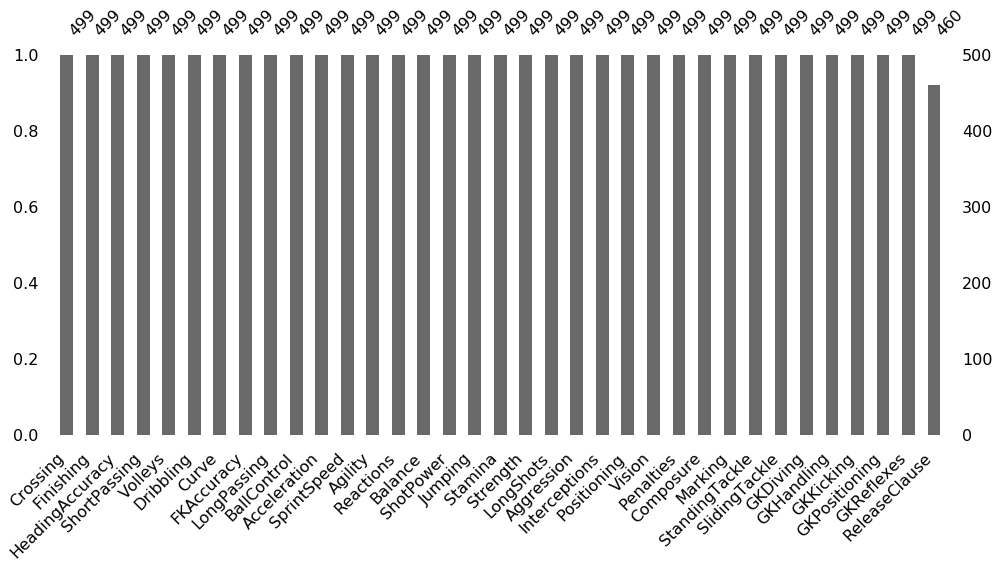

In [45]:
msno.bar(players.sample(500,random_state=1),
            figsize=(16, 7),)

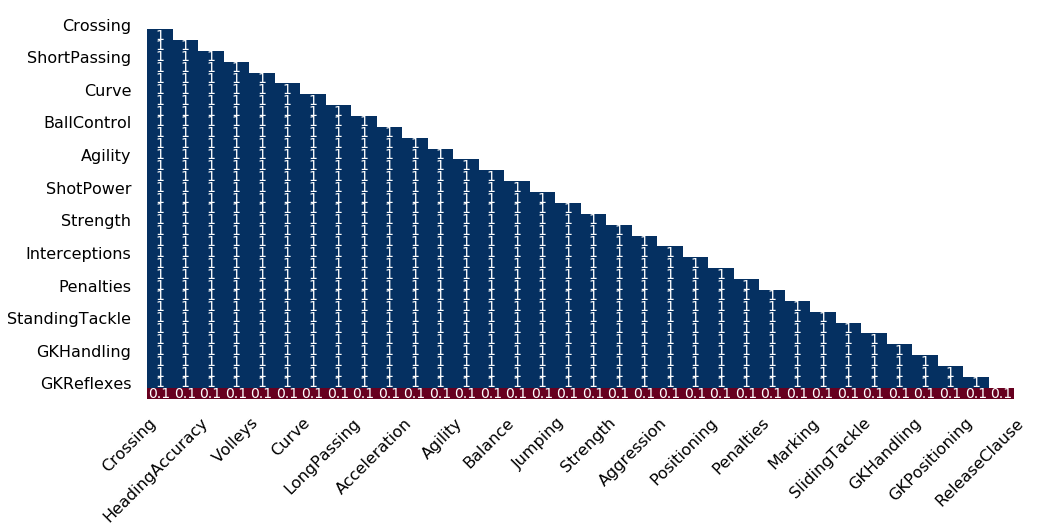

In [46]:
msno.heatmap(players.sample(500,random_state=1),
            figsize=(16, 7),)

#### From graph we can see that ReleaseClause having missing values and because of that correlation between all graphs is variying.
    Manupulating Last column
    1. We can delete that column to get clean data 
    2. we can fill missing values with its mean 

In [47]:
players.shape

(16432, 35)

In [48]:
players.ReleaseClause[:].mean()

39723727.932365865

In [49]:
a=[]
a.append(pd.isnull(players).any(1).nonzero()[0])

#### From 500 samples
    1.last colummn ReleaseClause shows 51 mising values and all other shows 1 value is missing.
    2.Now we will check exact missing values

In [50]:
players.isnull().sum()

Crossing             44
Finishing            44
HeadingAccuracy      44
ShortPassing         44
Volleys              44
Dribbling            44
Curve                44
FKAccuracy           44
LongPassing          44
BallControl          44
                   ... 
Composure            44
Marking              44
StandingTackle       44
SlidingTackle        44
GKDiving             44
GKHandling           44
GKKicking            44
GKPositioning        44
GKReflexes           44
ReleaseClause      1410
Length: 35, dtype: int64

In [51]:
fifa.ReleaseClause.mean()

39723727.932365865

In [52]:
fifa.ReleaseClause.mean()

39723727.932365865

In [53]:
players.ReleaseClause.mean()

39723727.932365865

In [54]:
players['ReleaseClause'].fillna(players.ReleaseClause.mean(), inplace=True)

In [55]:
players.ReleaseClause.dtype

dtype('float64')

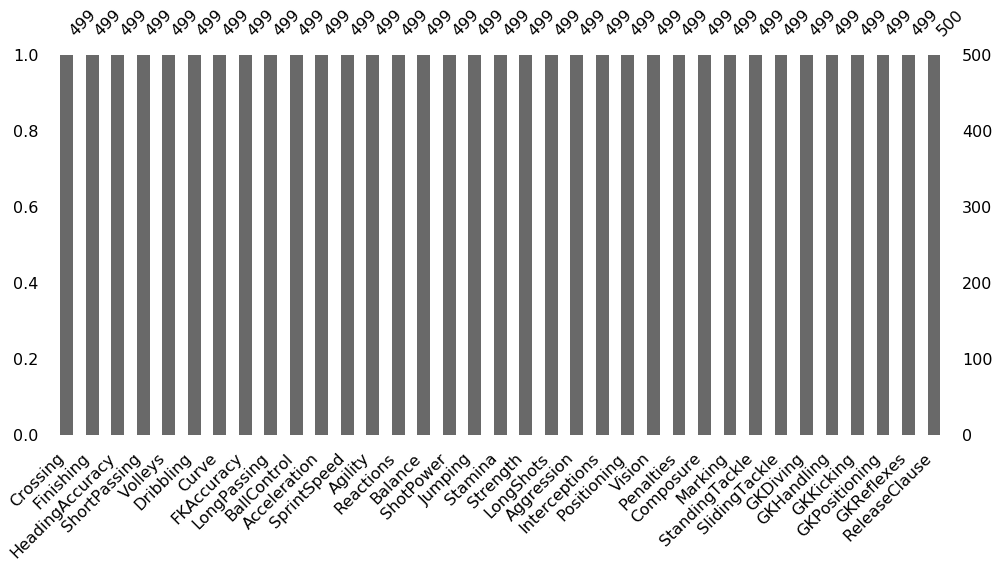

In [56]:
msno.bar(players.sample(500,random_state=1),
            figsize=(16, 7),)

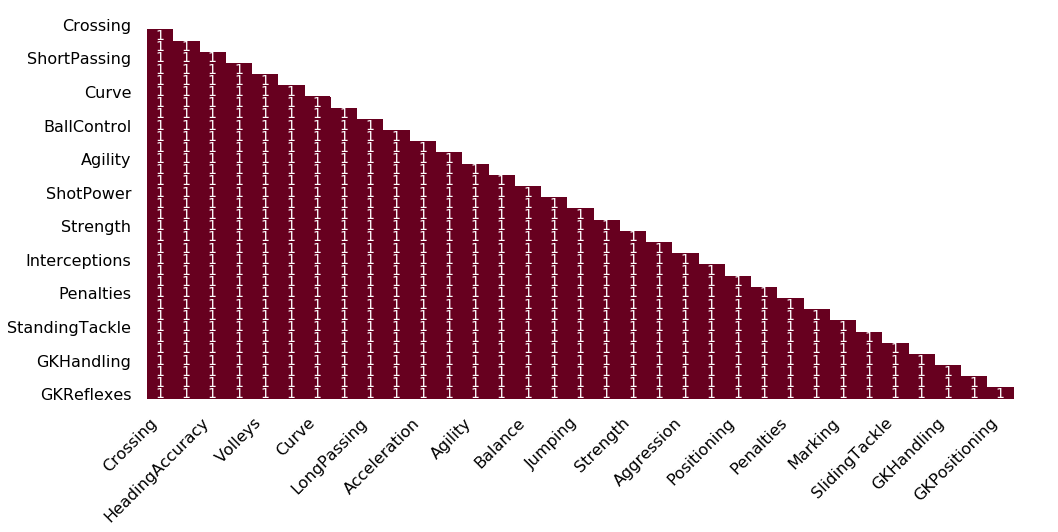

In [57]:
msno.heatmap(players.sample(500,random_state=1),
            figsize=(16, 7),)

In [58]:
players.head()

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause
Name,,,,,,,,,,,,,,,,,,,,,
A. Abang,30.0,61.0,67.0,52.0,58.0,56.0,30.0,28.0,28.0,59.0,...,45.0,32.0,17.0,21.0,6.0,6.0,7.0,13.0,9.0,7.230000e+05
A. Abdellaoui,56.0,25.0,56.0,53.0,32.0,39.0,30.0,35.0,45.0,47.0,...,51.0,61.0,66.0,65.0,15.0,10.0,14.0,13.0,14.0,2.590000e+05
A. Abdennour,56.0,48.0,74.0,58.0,32.0,48.0,48.0,39.0,62.0,51.0,...,75.0,68.0,73.0,75.0,12.0,8.0,7.0,8.0,15.0,3.972373e+07
A. Abdi,68.0,61.0,59.0,74.0,64.0,70.0,68.0,73.0,72.0,74.0,...,75.0,47.0,60.0,57.0,9.0,6.0,8.0,11.0,8.0,1.700000e+07
A. Abdu Jaber,39.0,66.0,61.0,49.0,64.0,61.0,59.0,39.0,40.0,59.0,...,49.0,17.0,13.0,15.0,7.0,11.0,7.0,6.0,12.0,8.430000e+05


### Positions

In [87]:
players_name='ID'
players_positions1=fifa[['Name','Age','Nationality','Position','Potential','Club','InternationalReputation','WeakFoot','SkillMoves','WorkRate','ContractValidUntil']]

In [88]:
players_pos = get_subgroup(fifa, players_name, players_positions1)

In [90]:
def save_subgroup1(dataframe, g_index, subgroup_name, prefix='player_'):
    save_subgroup_filename = "".join([prefix, subgroup_name, ".csv.gz"])
    dataframe.to_csv(save_subgroup_filename, compression='gzip', encoding='UTF-8')
    test_df = pd.read_csv(save_subgroup_filename, compression='gzip', index_col=g_index, encoding='UTF-8')
    # Test that we recover what we send in
    if dataframe.equals(test_df):
        print("Test-passed: we recover the equivalent subgroup dataframe.")
    else:
        print("Warning -- equivalence test!!! Double-check.")

In [91]:

save_subgroup1(players_pos, players_name, "players")

Test-passed: we recover the equivalent subgroup dataframe.


In [82]:
def load_subgroup(filename, index_col=[0]):
    return pd.read_csv(filename, compression='gzip', index_col=index_col)

In [85]:
players_std_pos = load_subgroup("raw_players.csv.gz")

In [86]:
players_std_pos

,Age,Nationality,Position,Potential,Club,InternationalReputation,WeakFoot,SkillMoves,WorkRate,ContractValidUntil
Name,,,,,,,,,,
A. Abang,21,Cameroon,ST,69,New York Red Bulls,1.0,2.0,2.0,High/ Low,2019
A. Abdellaoui,25,Algeria,LB,64,FC Sion,1.0,2.0,2.0,Medium/ High,2021
A. Abdennour,28,Tunisia,CB,73,Olympique de Marseille,2.0,3.0,2.0,Medium/ Medium,"Jun 30, 2019"
A. Abdi,31,Switzerland,CM,69,Sheffield Wednesday,2.0,4.0,3.0,Medium/ Low,2019
A. Abdu Jaber,21,Eritrea,ST,65,Al Wehda,1.0,3.0,2.0,Medium/ Low,2021
A. Abdulhameed,24,Saudi Arabia,GK,59,Al Hazem,1.0,3.0,1.0,Medium/ Medium,2021
A. Abedzadeh,25,Iran,GK,77,Clube Sport Marítimo,1.0,2.0,1.0,Medium/ Medium,2019
A. Abeid,20,Mauritania,LB,74,AD Alcorcón,1.0,3.0,2.0,High/ Medium,"Jun 30, 2019"
A. Ablet,31,China PR,LWB,59,Henan Jianye FC,1.0,4.0,2.0,High/ Medium,2019


### Create Tidy Clubs Table

In [73]:
club_index = 'Club'
club_cols = ['Nationality']
clubs = get_subgroup(fifa, club_index, club_cols)
clubs.head()

,Nationality
Club,
SSV Jahn Regensburg,Portugal
1. FC Heidenheim 1846,Germany
1. FC Kaiserslautern,Lithuania
1. FC Köln,United States
1. FC Magdeburg,Serbia


In [74]:
clubs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 651 entries,  SSV Jahn Regensburg to Śląsk Wrocław
Data columns (total 1 columns):
Nationality    651 non-null object
dtypes: object(1)
memory usage: 10.2+ KB


In [76]:
clubs.Nationality.value_counts()

Uruguay                79
Wales                  55
Spain                  49
United States          49
Venezuela              38
Turkey                 36
Sweden                 36
Switzerland            28
Ukraine                27
Serbia                 21
                       ..
Panama                  1
Colombia                1
Ecuador                 1
Nigeria                 1
Kazakhstan              1
Cuba                    1
Nicaragua               1
Mexico                  1
São Tomé & Príncipe     1
Suriname                1
Name: Nationality, Length: 65, dtype: int64

In [77]:
dyad_index = ['refNum', 'playerShort']
dyad_cols = ['games',
             'victories',
             'ties',
             'defeats',
             'goals',
             'yellowCards',
             'yellowReds',
             'redCards',
            ]

In [ ]:
dyads = get_subgroup(df, g_index=dyad_index, g_columns=dyad_cols)